In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load news data
news_data = pd.read_csv('../Data/raw_analyst_ratings.csv')

# Load stock price data (AAPL example)
stock_data = pd.read_csv('../Data/AAPL_historical_data.csv')

# View datasets
print(news_data.tail())
print(news_data.head())
print(stock_data.head())
print(stock_data.tail())


         Unnamed: 0                                           headline  \
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url       publisher  \
1407323  https://www.benzinga.com/news/11/08/1888782/to...   Monica Gerson   
1407324  https://www.benzinga.com/news/earnings/11/06/1...    Benjamin Lee   
1407325  https://www.benzinga.com/analyst-ratings/analy...  BenzingaStaffL   
1407326  https://www.benzinga.com/analyst-ratings/price...       Joe Young   
1407327  https://www.benzinga.com/news/ipos/11/05/10789...   Allie Wickman   

                        date stock  
1407323  2011-08-29 00:00:00    ZX  
1407324  201

In [54]:
print("News Data Columns:", news_data.columns)
print("Stock Data Columns:", stock_data.columns)


News Data Columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Stock Data Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [55]:
# Standardize column names to lowercase
news_data.columns = news_data.columns.str.lower()
stock_data.columns = stock_data.columns.str.lower()

# Check for 'date' column issues
print("News Date Sample Before:", news_data['date'].head())

# Fix 'date' parsing in news_data
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce').dt.date

# Fix 'date' parsing in stock_data
stock_data['date'] = pd.to_datetime(stock_data['date'], errors='coerce').dt.date

# Filter necessary columns
news_data = news_data[['date', 'headline']].copy()
stock_data = stock_data[['date', 'close']].copy()

# Check for NaT values
print("Invalid News Dates:", news_data['date'].isna().sum())
print("Invalid Stock Dates:", stock_data['date'].isna().sum())

# Check the output
print(news_data.head())
print(stock_data.head())


News Date Sample Before: 0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
Invalid News Dates: 1351341
Invalid Stock Dates: 0
         date                                           headline
0  2020-06-05            Stocks That Hit 52-Week Highs On Friday
1  2020-06-03         Stocks That Hit 52-Week Highs On Wednesday
2  2020-05-26                      71 Biggest Movers From Friday
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session
4  2020-05-22  B of A Securities Maintains Neutral on Agilent...
         date     close
0  1980-12-12  0.128348
1  1980-12-15  0.121652
2  1980-12-16  0.112723
3  1980-12-17  0.115513
4  1980-12-18  0.118862


In [58]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment_vader(text):
    if not isinstance(text, str):
        return 0  # Neutral sentiment for missing values
    return analyzer.polarity_scores(text)['compound']  # Compound sentiment score

# Apply sentiment analysis
news_data['sentiment'] = news_data['headline'].apply(get_sentiment_vader)

# Display results
print(news_data.head())
print(news_data.tail())


         date                                           headline  sentiment
0  2020-06-05            Stocks That Hit 52-Week Highs On Friday      0.000
1  2020-06-03         Stocks That Hit 52-Week Highs On Wednesday      0.000
2  2020-05-26                      71 Biggest Movers From Friday      0.000
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session      0.000
4  2020-05-22  B of A Securities Maintains Neutral on Agilent...      0.296
        date                                           headline  sentiment
1407323  NaT             Top Narrow Based Indexes For August 29     0.2023
1407324  NaT  Recap: Wednesday's Top Percentage Gainers and ...    -0.3818
1407325  NaT  UPDATE: Oppenheimer Color on China Zenix Auto ...     0.0000
1407326  NaT  Oppenheimer Initiates China Zenix At Outperfor...     0.0000
1407327  NaT  China Zenix Auto International Opens For Tradi...     0.0000


In [59]:
# Group by Date and calculate average sentiment
daily_sentiment = news_data.groupby('date')['sentiment'].mean().reset_index()

print(daily_sentiment.head())
print(daily_sentiment.tail())

         date  sentiment
0  2011-04-27    0.00000
1  2011-04-28    0.12500
2  2011-04-29    0.36755
3  2011-04-30    0.20230
4  2011-05-01    0.00000
            date  sentiment
2523  2020-06-07   0.040156
2524  2020-06-08   0.250540
2525  2020-06-09   0.283041
2526  2020-06-10   0.044075
2527  2020-06-11   0.123685


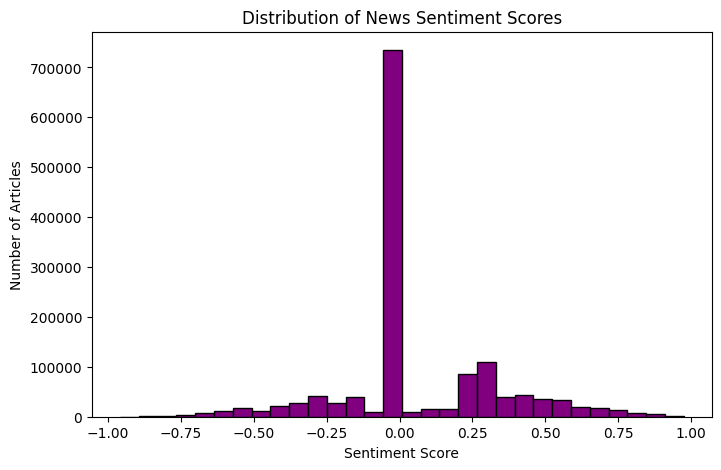

In [60]:
plt.figure(figsize=(8, 5))
plt.hist(news_data['sentiment'], bins=30, color='purple', edgecolor='black')
plt.title("Distribution of News Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.show()


In [62]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['close'].pct_change()

# Drop NA values caused by pct_change
stock_data.dropna(inplace=True)

print(stock_data.head())


         date     close  Daily_Return
2  1980-12-16  0.112723     -0.073398
3  1980-12-17  0.115513      0.024751
4  1980-12-18  0.118862      0.028992
5  1980-12-19  0.126116      0.061029
6  1980-12-22  0.132254      0.048670


In [63]:
# Merge datasets on Date
combined_data = pd.merge(stock_data, daily_sentiment, on='date', how='inner')

print(combined_data.head())


         date      close  Daily_Return  sentiment
0  2011-04-27  12.505357     -0.000771   0.000000
1  2011-04-28  12.383929     -0.009710   0.125000
2  2011-04-29  12.504643      0.009748   0.367550
3  2011-05-02  12.367143     -0.010996   0.136444
4  2011-05-03  12.435714      0.005545   0.000000


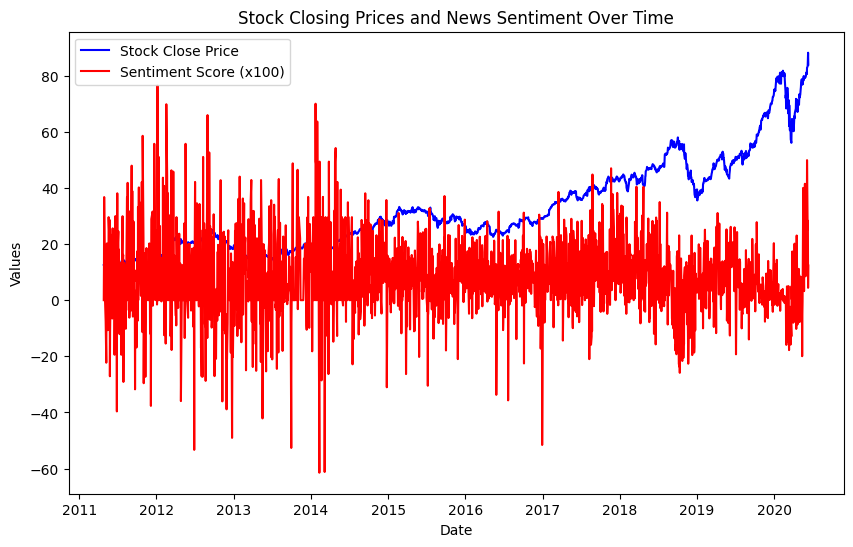

In [64]:
plt.figure(figsize=(10, 6))

# Plot stock closing prices
plt.plot(combined_data['date'], combined_data['close'], label='Stock Close Price', color='blue')

# Plot sentiment scores
plt.plot(combined_data['date'], combined_data['sentiment'] * 100, label='Sentiment Score (x100)', color='red')

plt.title("Stock Closing Prices and News Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.show()


In [65]:
correlation = combined_data['Daily_Return'].corr(combined_data['sentiment'])

print(f"Pearson Correlation Coefficient: {correlation}")


Pearson Correlation Coefficient: 0.04831640960297668


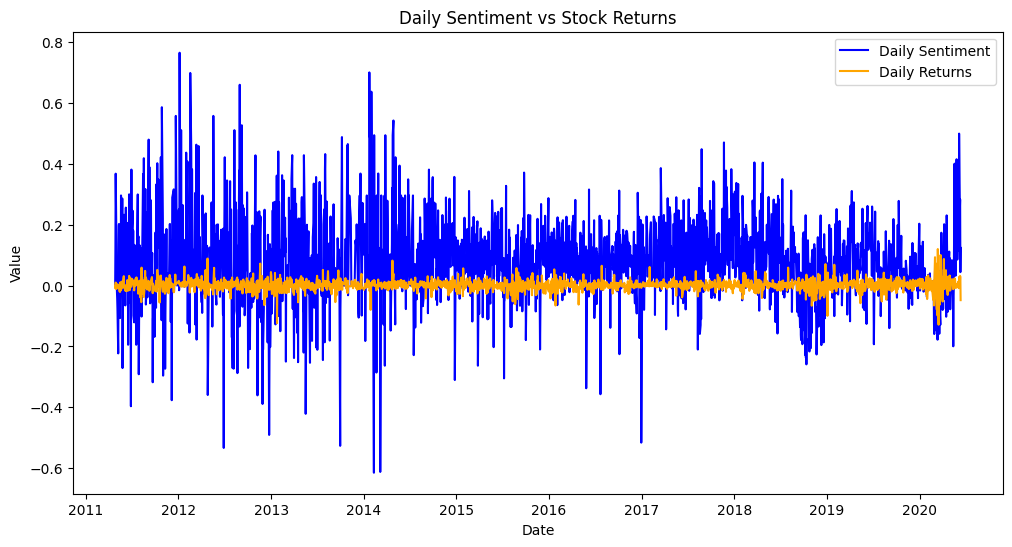

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot daily sentiment
plt.plot(combined_data['date'], combined_data['sentiment'], label='Daily Sentiment', color='blue')

# Plot daily returns
plt.plot(combined_data['date'], combined_data['Daily_Return'], label='Daily Returns', color='orange')

plt.title('Daily Sentiment vs Stock Returns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_1480\18162351.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_groups = combined_data.groupby(pd.cut(combined_data['sentiment'], bins=5))['Daily_Return'].mean()
C:\Users\hp\AppData\Local\Temp\ipykernel_1480\18162351.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='Daily_Return', data=sentiment_groups, palette='coolwarm')


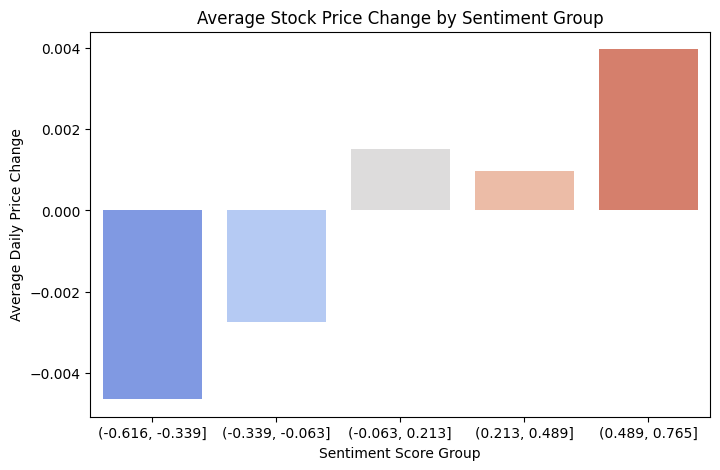

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by sentiment ranges and calculate the average price change
sentiment_groups = combined_data.groupby(pd.cut(combined_data['sentiment'], bins=5))['Daily_Return'].mean()

# Reset the index for better plotting
sentiment_groups = sentiment_groups.reset_index()

# Plotting using Seaborn for a more visually appealing bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='sentiment', y='Daily_Return', data=sentiment_groups, palette='coolwarm')

# Set the title and labels
plt.title("Average Stock Price Change by Sentiment Group")
plt.xlabel("Sentiment Score Group")
plt.ylabel("Average Daily Price Change")

# Show the plot
plt.show()
